In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from scipy import stats
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import accuracy_score
from itertools import permutations
import warnings
warnings.filterwarnings("ignore")


In [2]:
wine = datasets.load_wine()
data = wine.data
targets = wine.target

In [3]:
wine.feature_names 
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)


In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


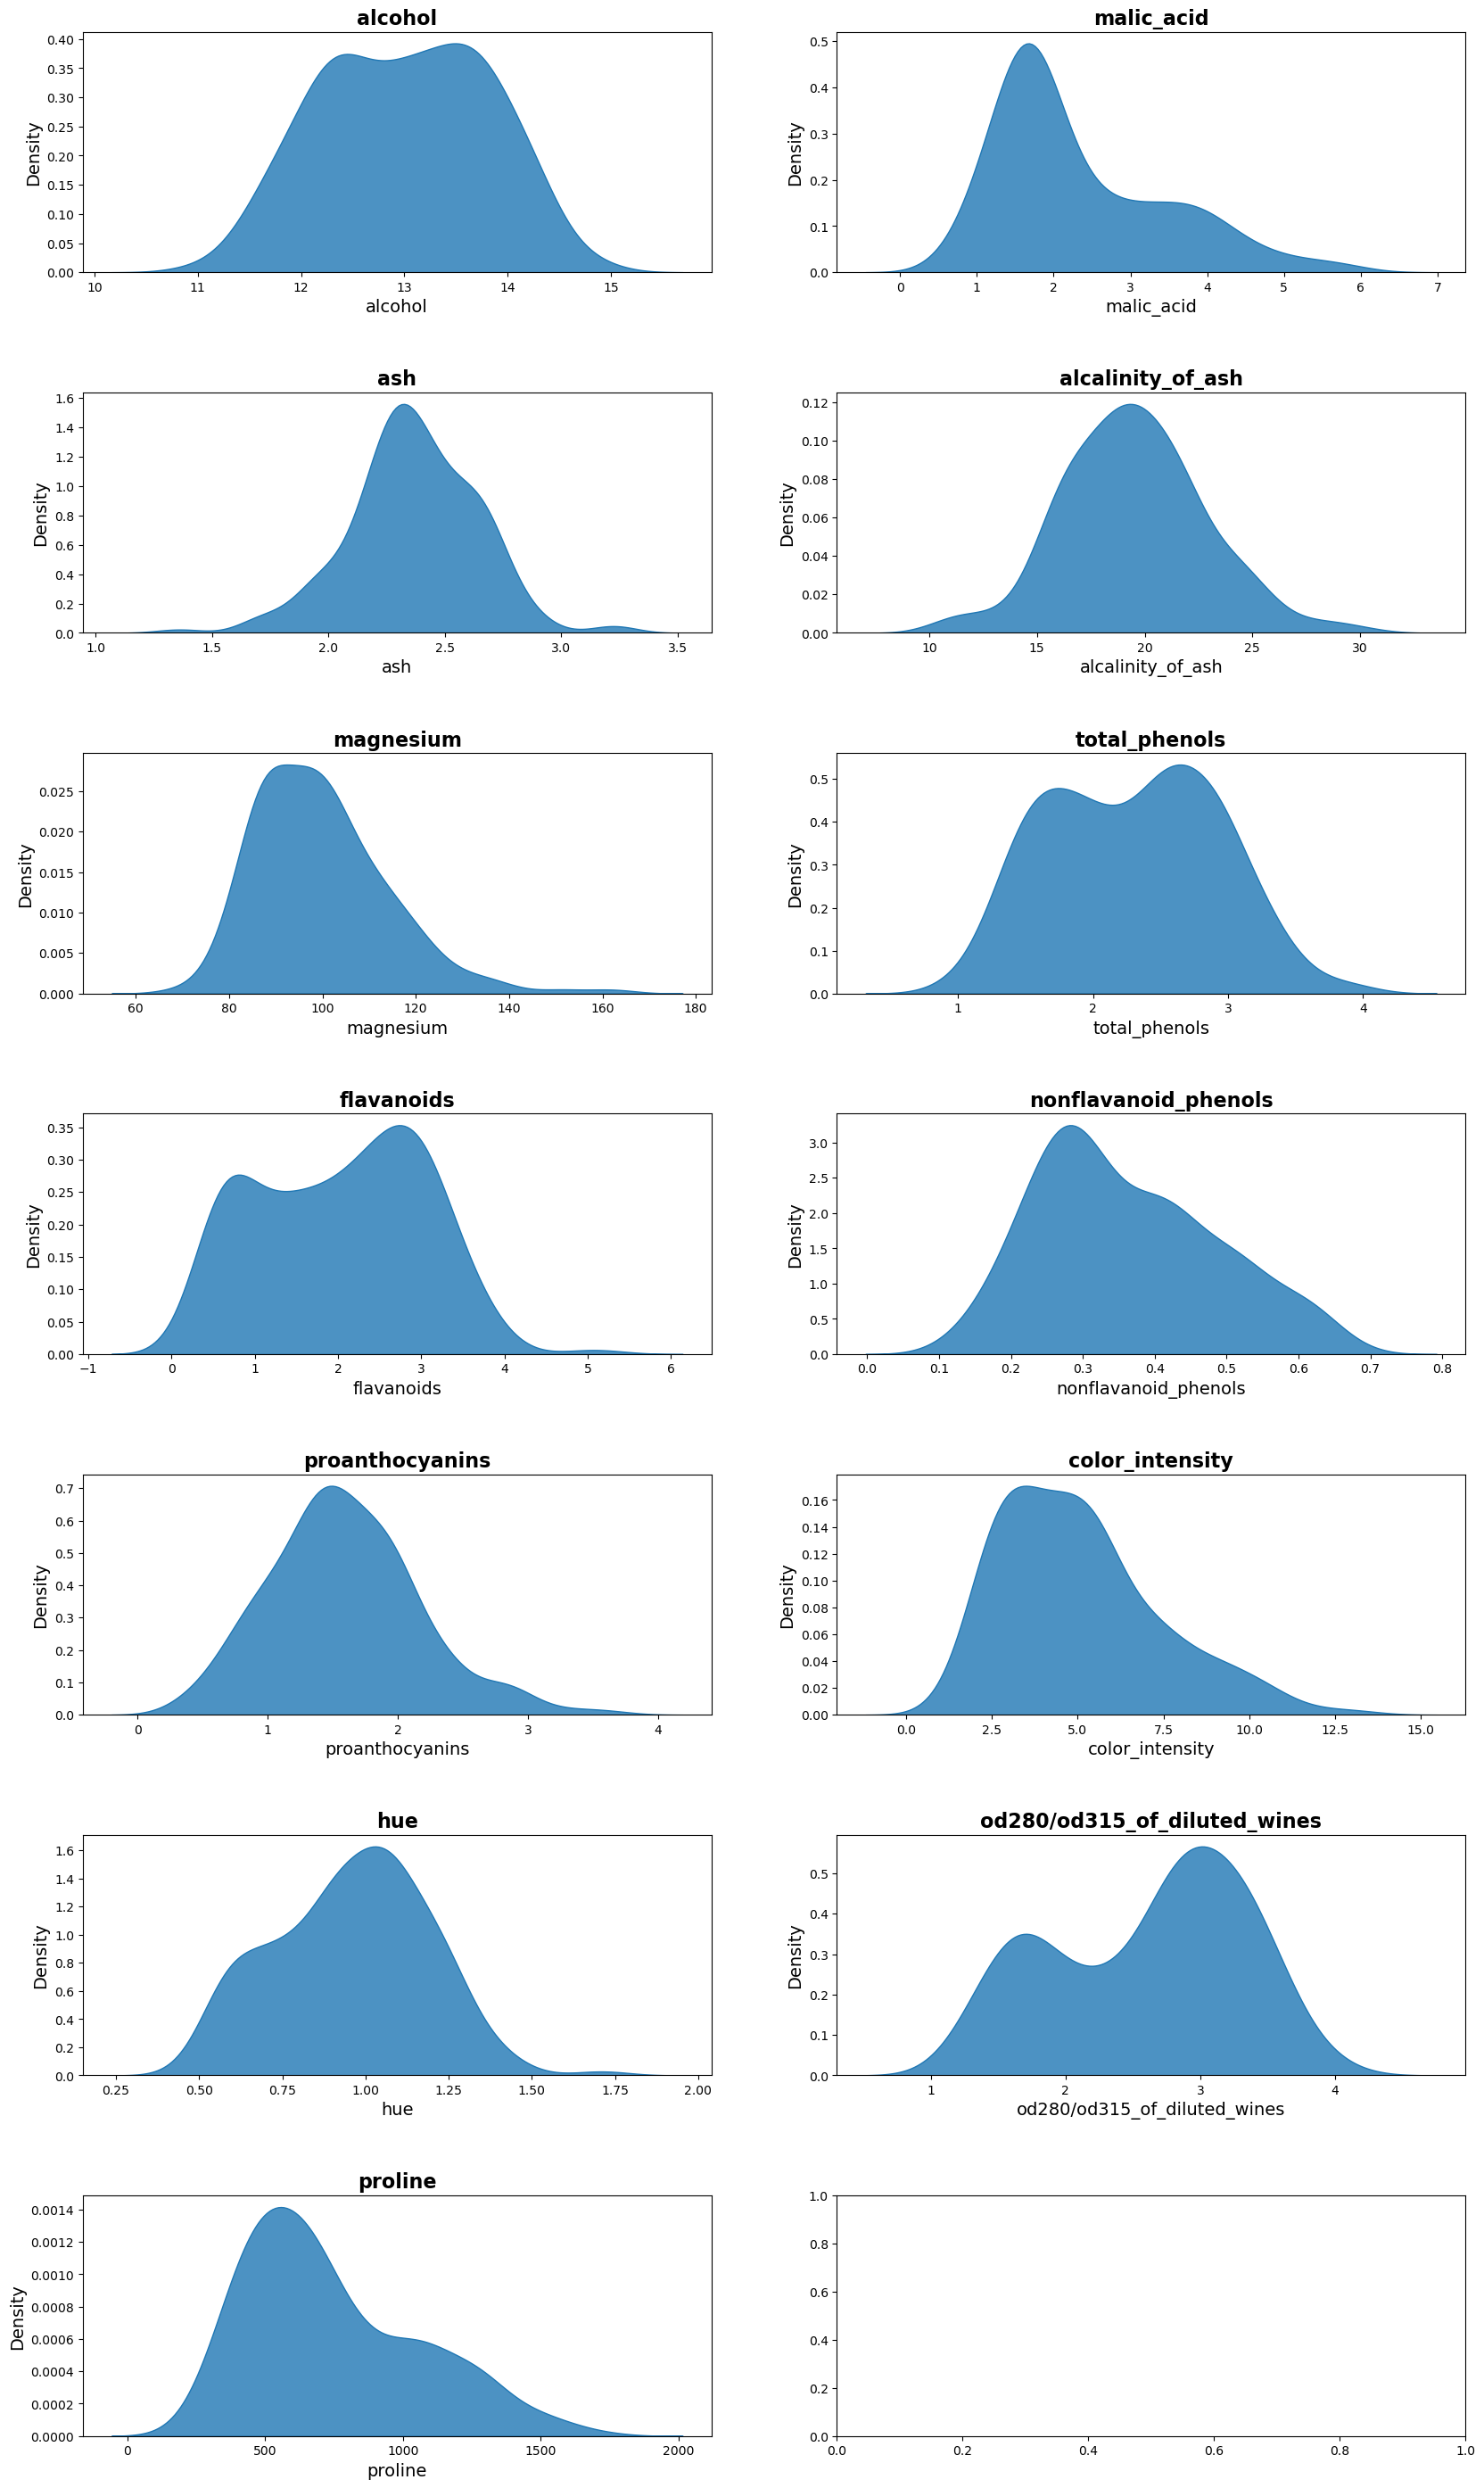

In [ ]:
fig, axes = plt.subplots(7,2, figsize = (20,35))

plt.subplots_adjust(hspace=0.5)

columns = df.columns

for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df,
                x = column,
                fill = True,
                alpha = 0.8,
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Density', fontsize = 14)
    

plt.show()


In [6]:
scaler = StandardScaler()
columns = df.columns
df[columns] = scaler.fit_transform(df[columns])
wine_features_normalized = scaler.fit_transform(df[columns])
z_scores = stats.zscore(wine_features_normalized)
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)

df_filtered = df.drop(df.index[outlier_indices[0]])
targets_filtered = np.delete(targets, outlier_indices[0])
df.head()
df_filtered.describe()
len(targets_filtered)


168

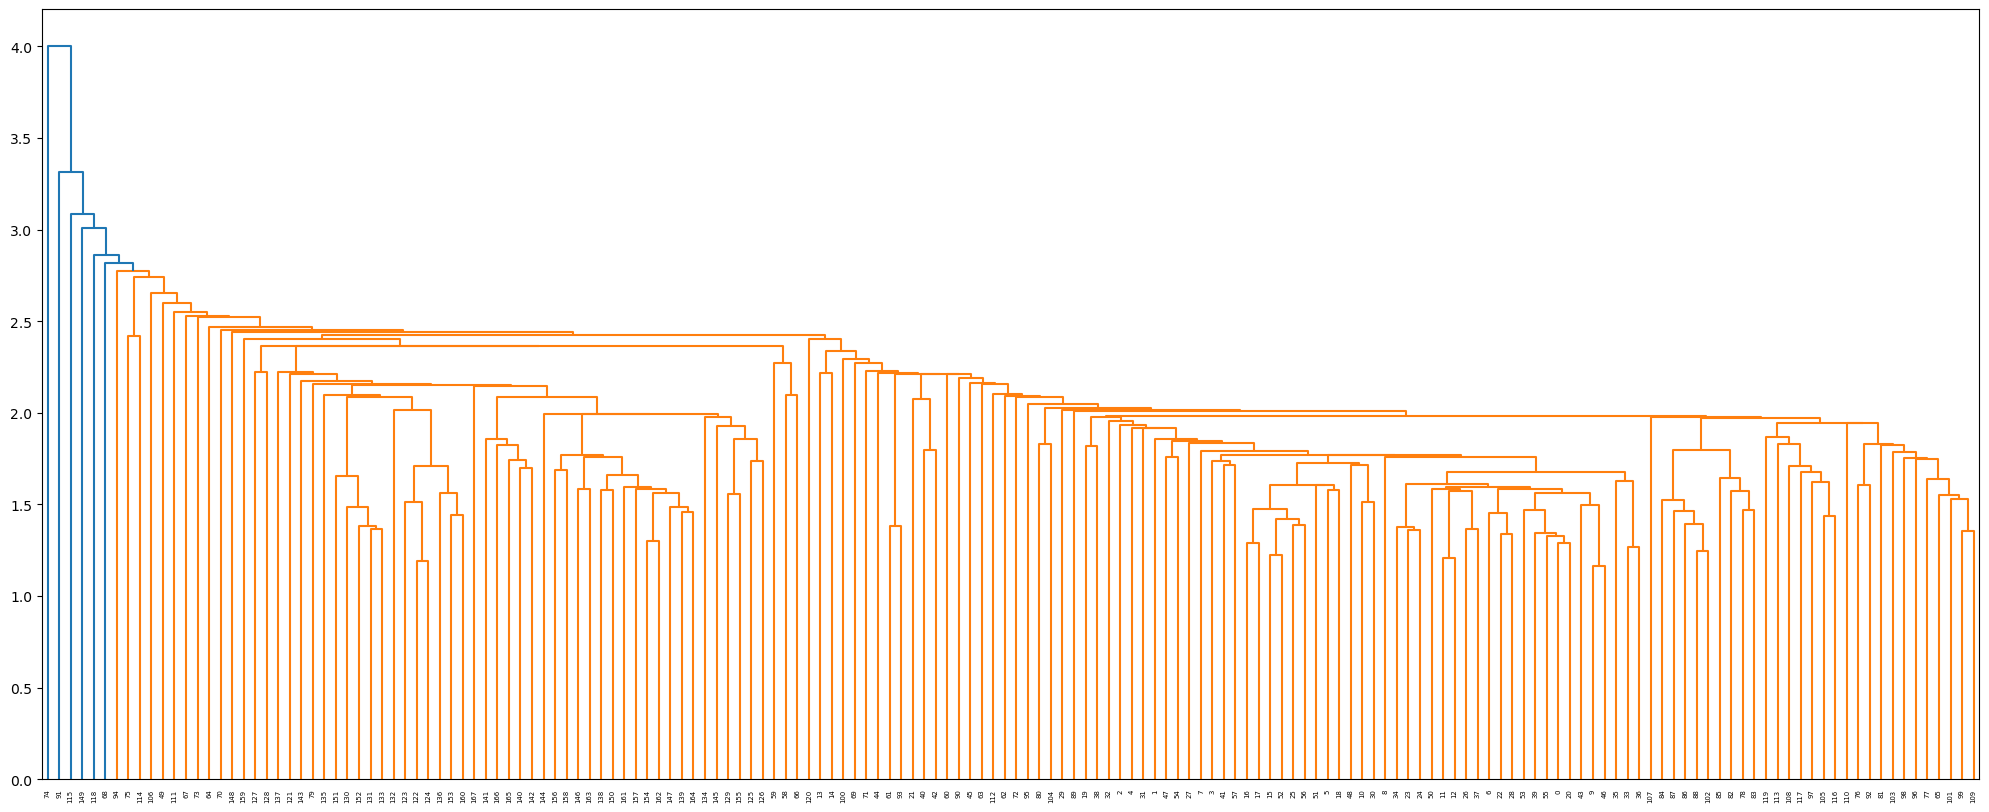

In [7]:
Z_single = linkage(df_filtered,'single')
plt.figure(figsize=(25, 10))
dendrogram(Z_single)
plt.show()

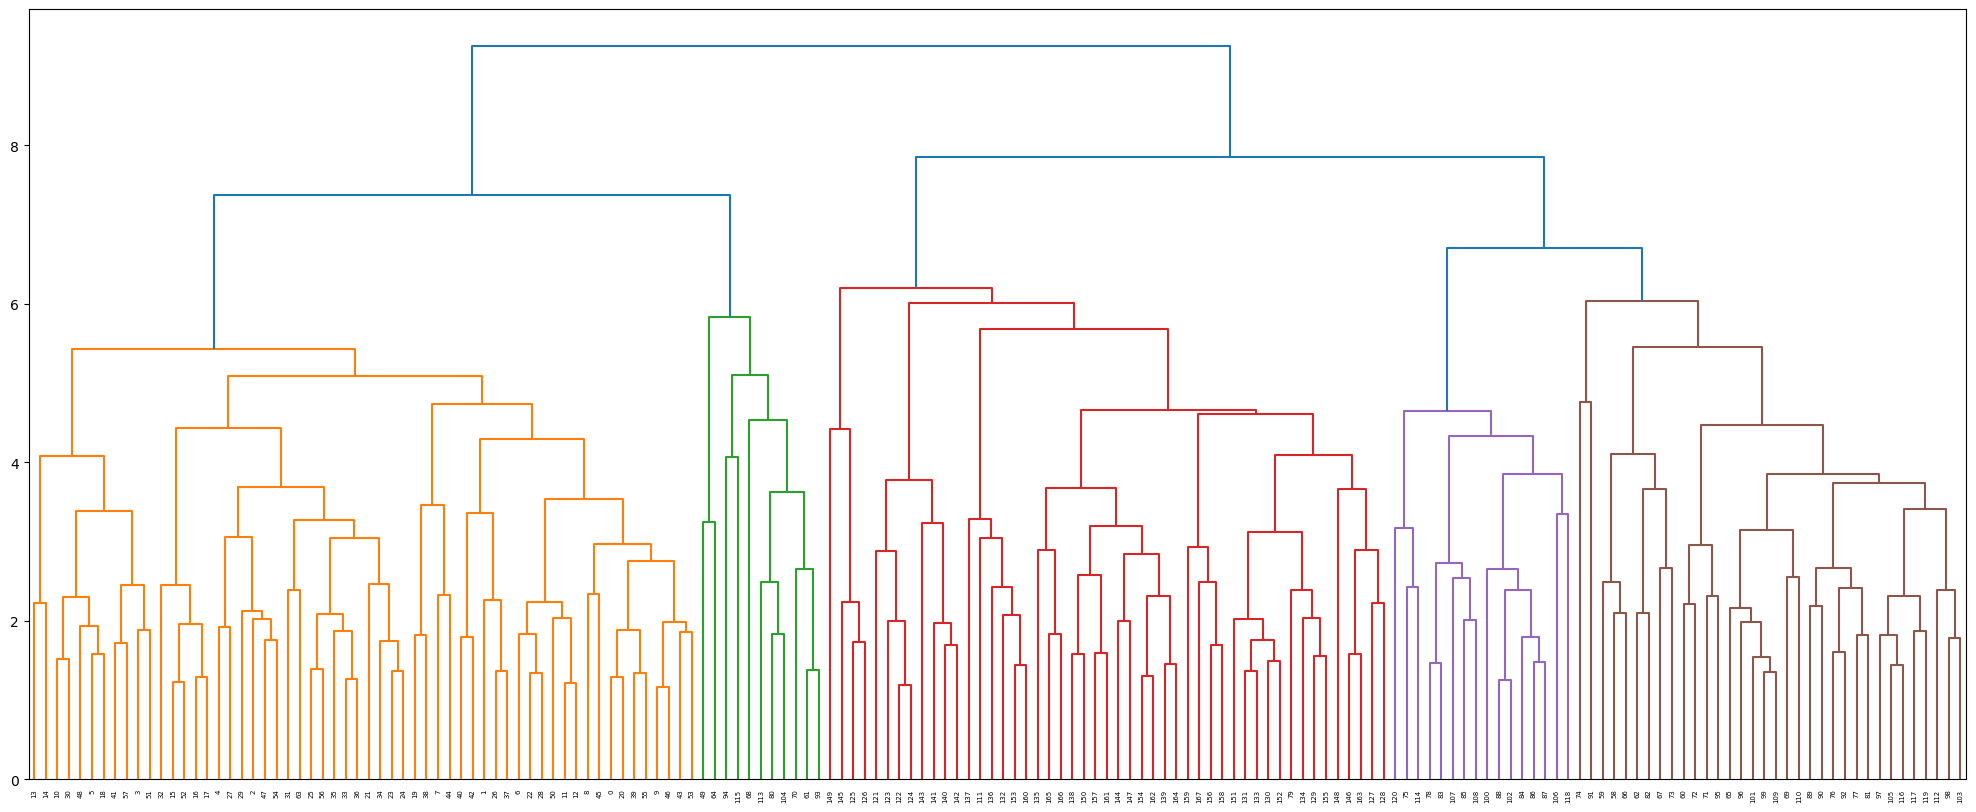

In [8]:
Z_complete= linkage(df_filtered,'complete')
plt.figure(figsize=(25, 10))
dendrogram(Z_complete)
plt.show()

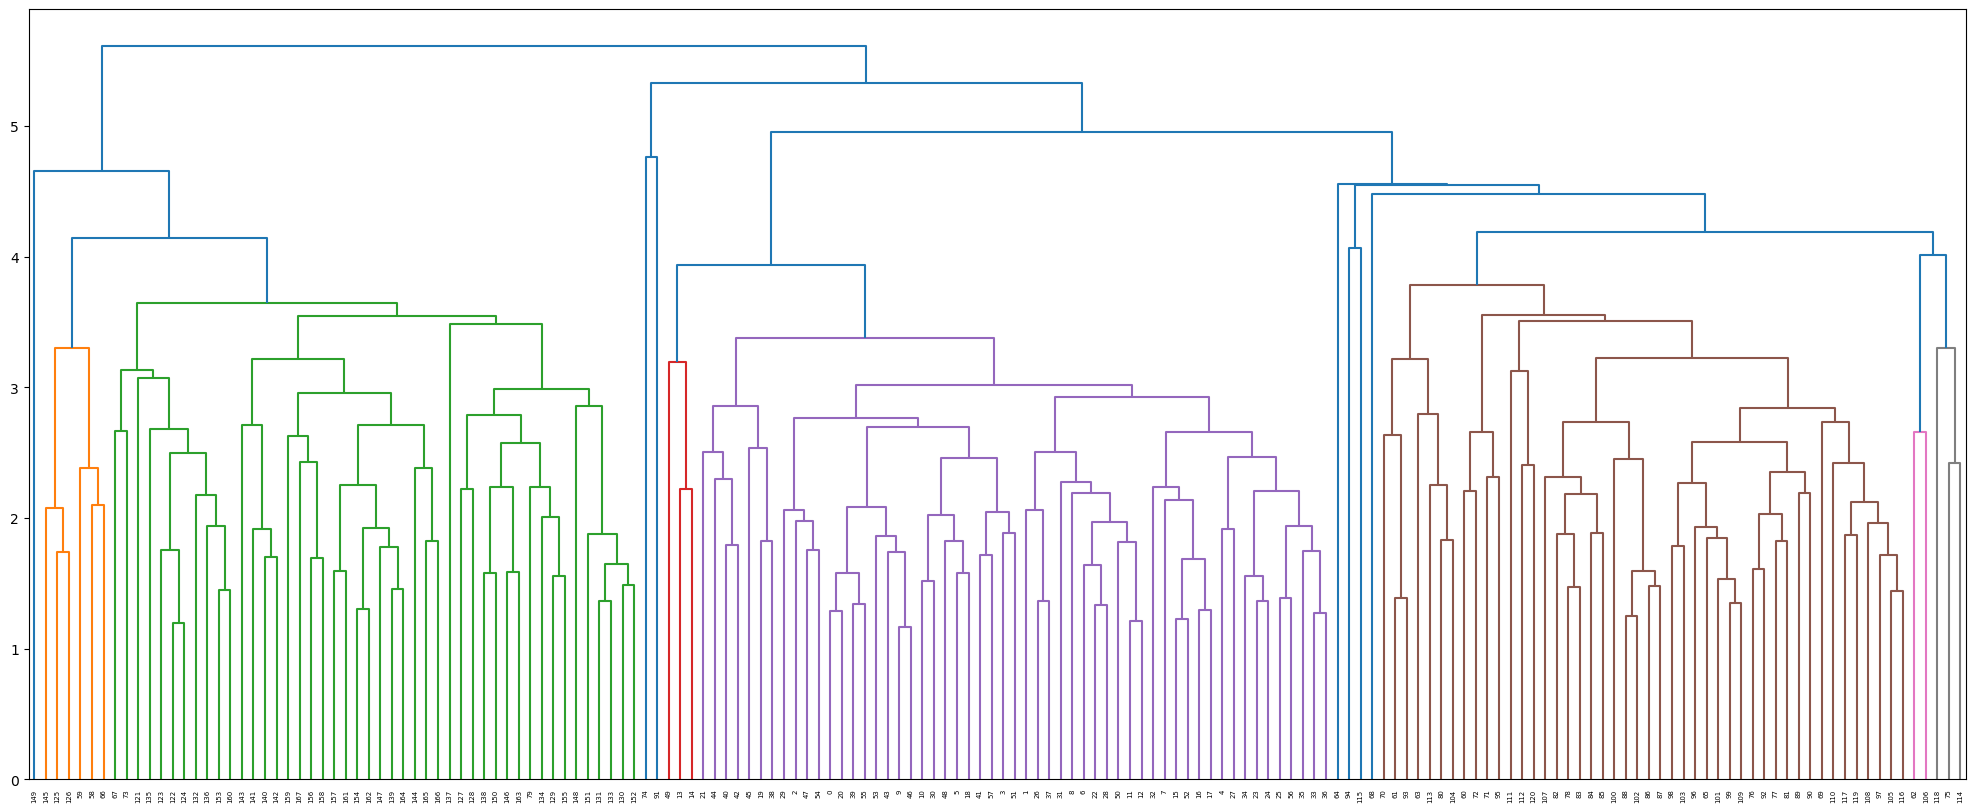

In [9]:
Z_average= linkage(df_filtered,'average')
plt.figure(figsize=(25, 10))
dendrogram(Z_average)
plt.show()

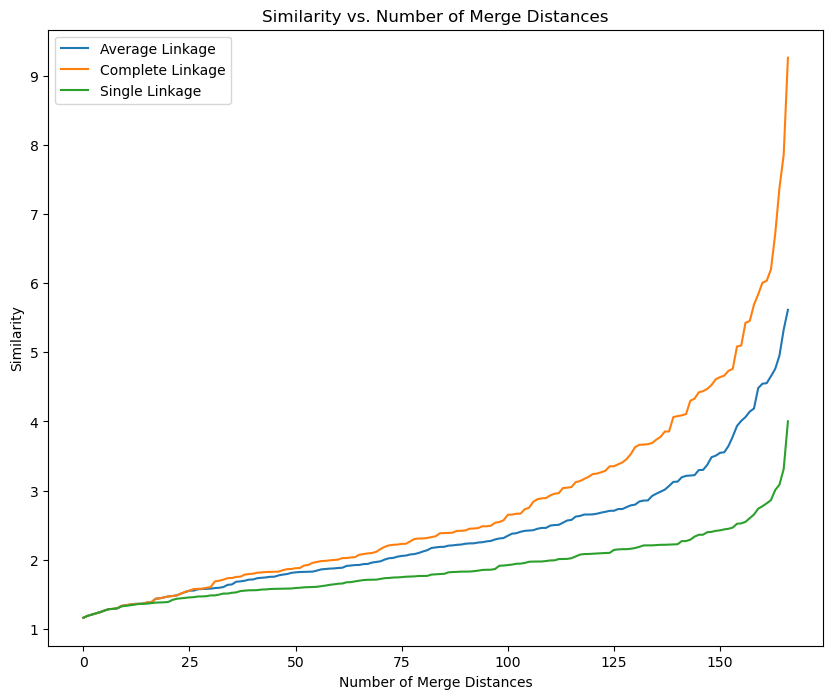

In [10]:
distance_values_average = Z_average[:, 2]
distance_values_complete = Z_complete[:, 2]
distance_values_single = Z_single[:, 2]

plt.figure(figsize=(10, 8))
plt.plot(distance_values_average, label='Average Linkage')
plt.plot(distance_values_complete, label='Complete Linkage')
plt.plot(distance_values_single, label='Single Linkage')
plt.xlabel('Number of Merge Distances')
plt.ylabel('Similarity')
plt.title('Similarity vs. Number of Merge Distances')
plt.legend()
plt.show()

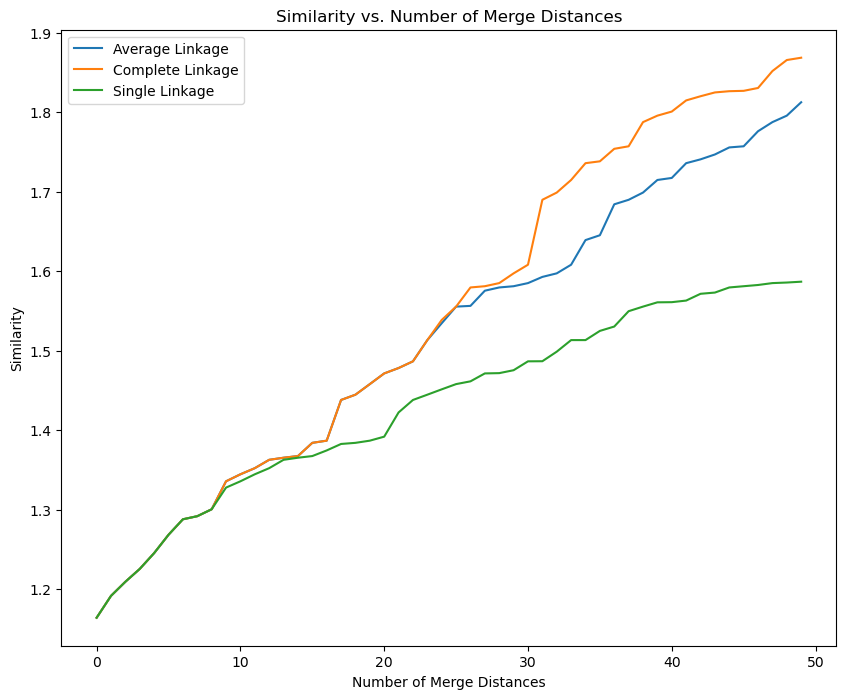

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(distance_values_average[:50], label='Average Linkage')
plt.plot(distance_values_complete[:50], label='Complete Linkage')
plt.plot(distance_values_single[:50], label='Single Linkage')
plt.xlabel('Number of Merge Distances')
plt.ylabel('Similarity')
plt.title('Similarity vs. Number of Merge Distances')
plt.legend()
plt.show()

In [12]:
num_clusters = 3
clusters_average = fcluster(Z_average, num_clusters, criterion='maxclust')


In [13]:
best_accuracy = 0.0
best_permutation = None

unique_labels = np.unique(targets_filtered)
for permutation in permutations(unique_labels):
    permuted_clusters = [permutation[label - 1] for label in clusters_average]
    accuracy = accuracy_score(targets_filtered, permuted_clusters)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_permutation = permutation

best_clusters = [best_permutation[label - 1] for label in clusters_average]

print("Best Accuracy:", best_accuracy)
print("Best Permutation:", best_permutation)


Best Accuracy: 0.6369047619047619
Best Permutation: (2, 1, 0)


In [14]:
num_clusters = 3
clusters_complete = fcluster(Z_complete, num_clusters, criterion='maxclust')

best_accuracy = 0.0
best_permutation = None

unique_labels = np.unique(targets_filtered)
for permutation in permutations(unique_labels):
    permuted_clusters = [permutation[label - 1] for label in clusters_complete]
    accuracy = accuracy_score(targets_filtered, permuted_clusters)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_permutation = permutation

best_clusters_c = [best_permutation[label - 1] for label in clusters_complete]

print("Best Accuracy:", best_accuracy)
print("Best Permutation:", best_permutation)

Best Accuracy: 0.9226190476190477
Best Permutation: (0, 2, 1)


In [15]:
num_clusters = 3
clusters_single = fcluster(Z_single, num_clusters, criterion='maxclust')

best_accuracy = 0.0
best_permutation = None

unique_labels = np.unique(targets_filtered)
for permutation in permutations(unique_labels):
    permuted_clusters = [permutation[label - 1] for label in clusters_single]
    accuracy = accuracy_score(targets_filtered, permuted_clusters)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_permutation = permutation

best_clusters_s = [best_permutation[label - 1] for label in clusters_single]

print("Best Accuracy:", best_accuracy)
print("Best Permutation:", best_permutation)


Best Accuracy: 0.3630952380952381
Best Permutation: (1, 0, 2)


In [16]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(df_filtered)

clusters_single = kmeans.labels_

best_accuracy = 0.0
best_permutation = None

unique_labels = np.unique(targets_filtered)
for permutation in permutations(unique_labels):
    permuted_clusters = [permutation[label] for label in clusters_single]
    accuracy = accuracy_score(targets_filtered, permuted_clusters)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_permutation = permutation

best_clusters_s = [best_permutation[label] for label in clusters_single]

print("Best Accuracy:", best_accuracy)
print("Best Permutation:", best_permutation)

Best Accuracy: 0.9821428571428571
Best Permutation: (0, 2, 1)


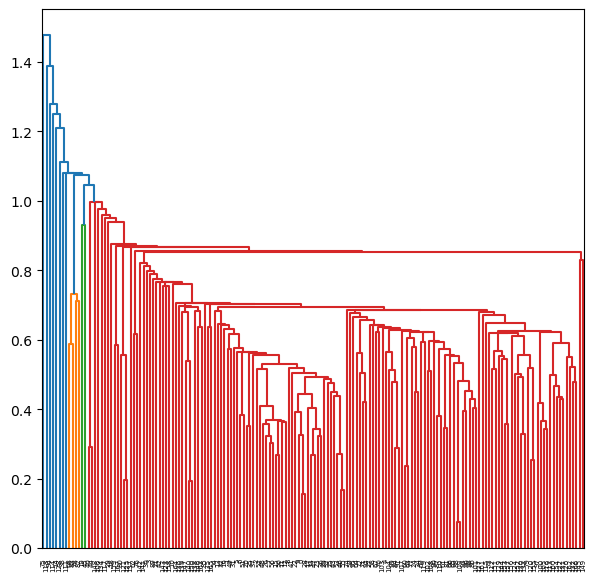

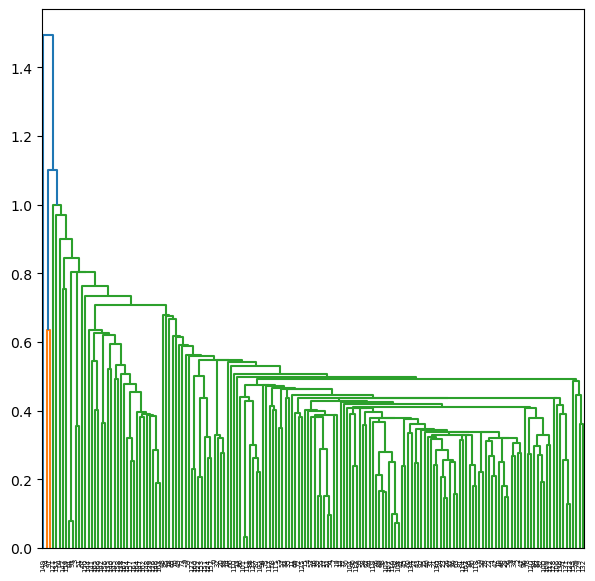

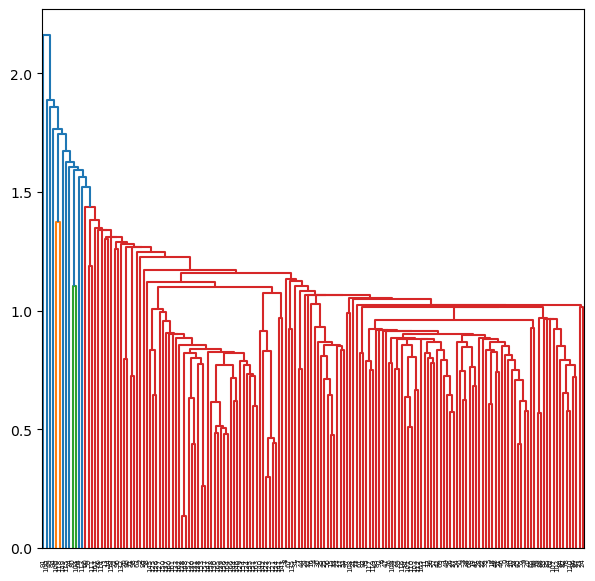

In [17]:
subset1=df_filtered[['malic_acid', 'alcalinity_of_ash', 'hue', 'proline']]
subset2=df_filtered[['magnesium', 'total_phenols', 'color_intensity']]
subset3=df_filtered[['alcohol', 'ash', 'flavanoids', 'proanthocyanins', 'nonflavanoid_phenols', 'od280/od315_of_diluted_wines']]

Z1_single = linkage(subset1,'single')
plt.figure(figsize=(7,7))
dendrogram(Z1_single)
plt.show()

Z2_single = linkage(subset2,'single')
plt.figure(figsize=(7,7))
dendrogram(Z2_single)
plt.show()

Z3_single = linkage(subset3,'single')
plt.figure(figsize=(7,7))
dendrogram(Z3_single)
plt.show()


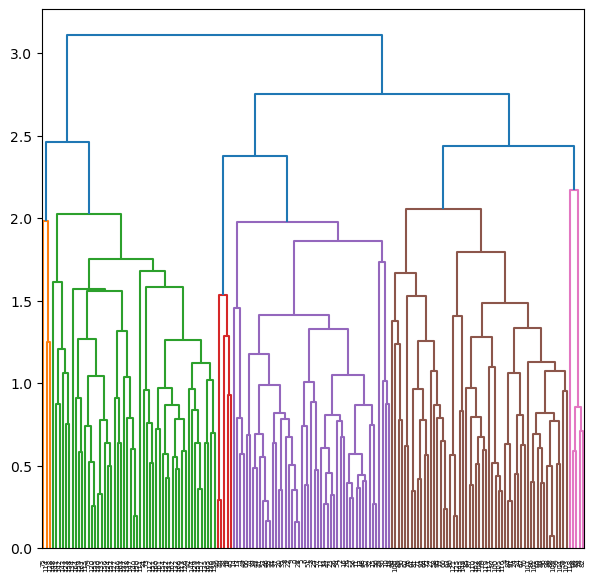

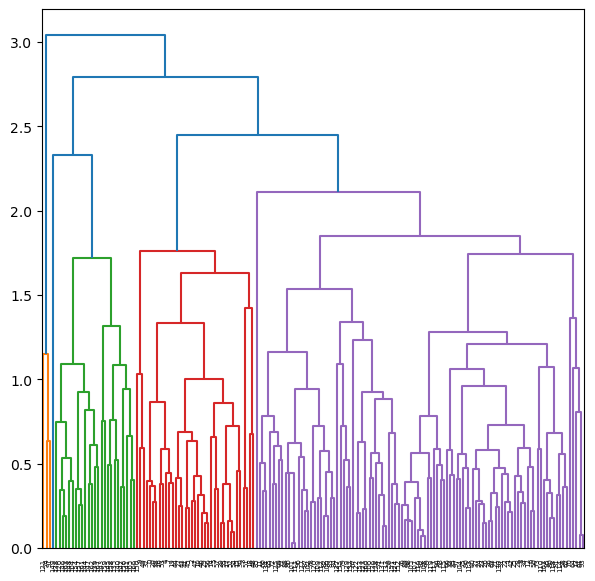

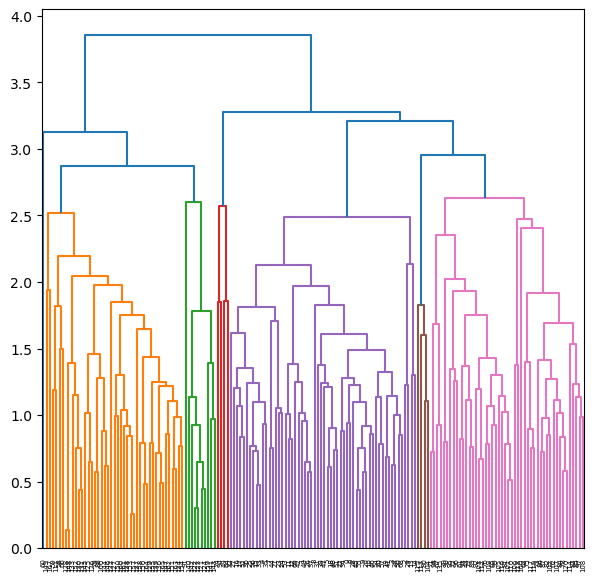

In [18]:
Z1_average = linkage(subset1,'average')
plt.figure(figsize=(7,7))
dendrogram(Z1_average)
plt.show()

Z2_average = linkage(subset2,'average')
plt.figure(figsize=(7,7))
dendrogram(Z2_average)
plt.show()

Z3_average = linkage(subset3,'average')
plt.figure(figsize=(7,7))
dendrogram(Z3_average)
plt.show()

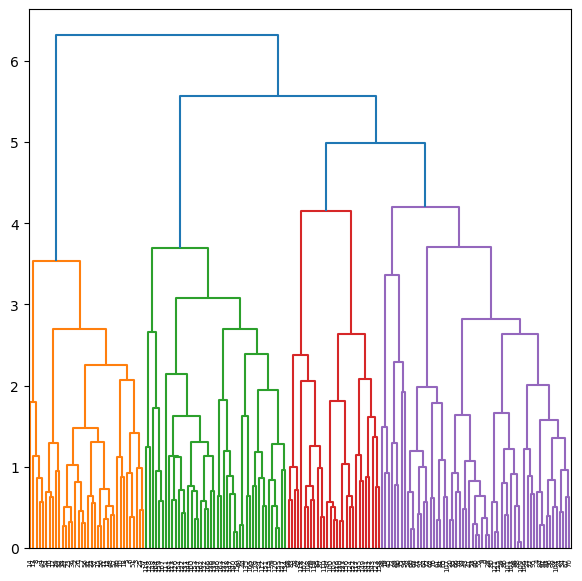

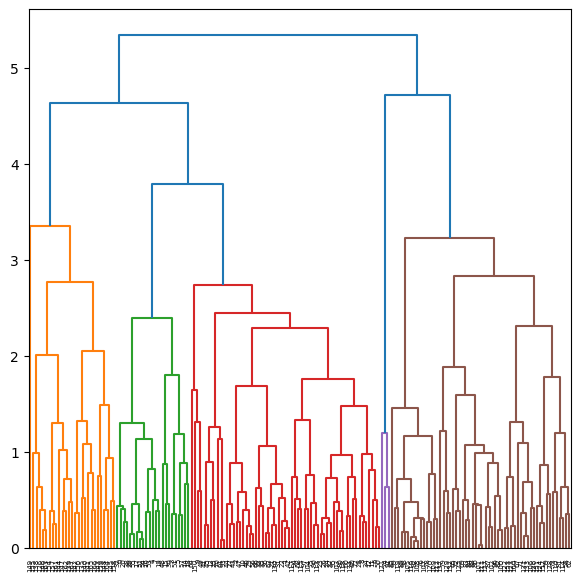

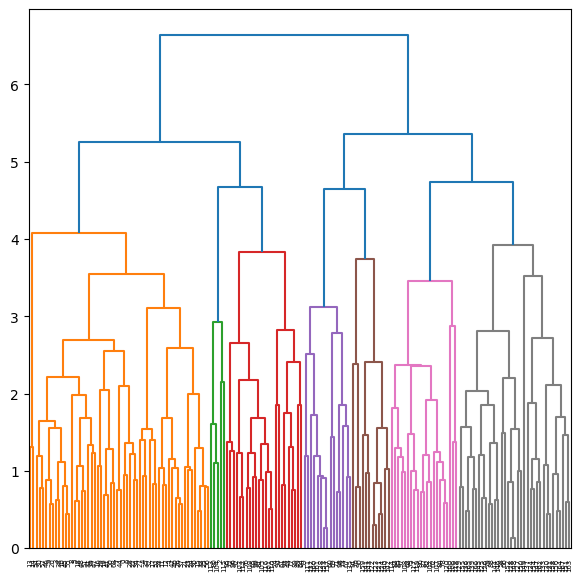

In [19]:
Z1_complete = linkage(subset1,'complete')
plt.figure(figsize=(7,7))
dendrogram(Z1_complete)
plt.show()

Z2_complete = linkage(subset2,'complete')
plt.figure(figsize=(7,7))
dendrogram(Z2_complete)
plt.show()

Z3_complete = linkage(subset3,'complete')
plt.figure(figsize=(7,7))
dendrogram(Z3_complete)
plt.show()

In [20]:
clusters_single_1 = fcluster(Z1_single, num_clusters, criterion='maxclust')

clusters_single_2 = fcluster(Z2_single, num_clusters, criterion='maxclust')

clusters_single_3 = fcluster(Z3_single, num_clusters, criterion='maxclust')

best_accuracy1= best_accuracy2= best_accuracy3  = 0.0
best_permutation1=best_permutation2=best_permutation3 = None

unique_labels = np.unique(targets_filtered)

for permutation in permutations(unique_labels):

    permuted_clusters_1 = [permutation[label - 1] for label in clusters_single_1]
    accuracy_1 = accuracy_score(targets_filtered, permuted_clusters_1)
    
    permuted_clusters_2 = [permutation[label - 1] for label in clusters_single_2]
    accuracy_2 = accuracy_score(targets_filtered, permuted_clusters_2)
    
    permuted_clusters_3 = [permutation[label - 1] for label in clusters_single_3]
    accuracy_3 = accuracy_score(targets_filtered, permuted_clusters_3)
    
    
    if accuracy_1 > best_accuracy1:
        best_accuracy1 = accuracy_1
        best_permutation1 = permutation
    if accuracy_2 > best_accuracy2:
        best_accuracy2 = accuracy_2
        best_permutation2 = permutation
    if accuracy_3 > best_accuracy3:
        best_accuracy3 = accuracy_3
        best_permutation3 = permutation


print("Best Accuracy:", best_accuracy1)
print("Best Permutation:", best_permutation1)

print("Best Accuracy:", best_accuracy2)
print("Best Permutation:", best_permutation2)

print("Best Accuracy:", best_accuracy3)
print("Best Permutation:", best_permutation3)

Best Accuracy: 0.3630952380952381
Best Permutation: (1, 0, 2)
Best Accuracy: 0.36904761904761907
Best Permutation: (0, 1, 2)
Best Accuracy: 0.3630952380952381
Best Permutation: (1, 0, 2)


In [21]:
clusters_average_1 = fcluster(Z1_average, num_clusters, criterion='maxclust')

clusters_average_2 = fcluster(Z2_average, num_clusters, criterion='maxclust')

clusters_average_3 = fcluster(Z3_average, num_clusters, criterion='maxclust')

best_accuracy1= best_accuracy2= best_accuracy3  = 0.0
best_permutation = None

unique_labels = np.unique(targets_filtered)

for permutation in permutations(unique_labels):
    permuted_clusters_1 = [permutation[label - 1] for label in clusters_average_1]
    accuracy_1 = accuracy_score(targets_filtered, permuted_clusters_1)
    
    permuted_clusters_2 = [permutation[label - 1] for label in clusters_average_2]
    accuracy_2 = accuracy_score(targets_filtered, permuted_clusters_2)
    
    permuted_clusters_3 = [permutation[label - 1] for label in clusters_average_3]
    accuracy_3 = accuracy_score(targets_filtered, permuted_clusters_3)
    
    
    if accuracy_1 > best_accuracy1:
        best_accuracy1 = accuracy_1
        best_permutation1 = permutation
    if accuracy_2 > best_accuracy2:
        best_accuracy2 = accuracy_2
        best_permutation2 = permutation
    if accuracy_3 > best_accuracy3:
        best_accuracy3 = accuracy_3
        best_permutation3 = permutation


print("Best Accuracy:", best_accuracy1)
print("Best Permutation:", best_permutation1)

print("Best Accuracy:", best_accuracy2)
print("Best Permutation:", best_permutation2)

print("Best Accuracy:", best_accuracy3)
print("Best Permutation:", best_permutation3)

Best Accuracy: 0.875
Best Permutation: (2, 0, 1)
Best Accuracy: 0.5178571428571429
Best Permutation: (0, 2, 1)
Best Accuracy: 0.6309523809523809
Best Permutation: (2, 1, 0)


In [22]:
clusters_complete_1 = fcluster(Z1_complete, num_clusters, criterion='maxclust')

clusters_complete_2 = fcluster(Z2_complete, num_clusters, criterion='maxclust')

clusters_complete_3 = fcluster(Z3_complete, num_clusters, criterion='maxclust')

best_accuracy1= best_accuracy2= best_accuracy3  = 0.0
best_permutation = None

unique_labels = np.unique(targets_filtered)

for permutation in permutations(unique_labels):
    permuted_clusters_1 = [permutation[label - 1] for label in clusters_complete_1]
    accuracy_1 = accuracy_score(targets_filtered, permuted_clusters_1)
    
    permuted_clusters_2 = [permutation[label - 1] for label in clusters_complete_2]
    accuracy_2 = accuracy_score(targets_filtered, permuted_clusters_2)
    
    permuted_clusters_3 = [permutation[label - 1] for label in clusters_complete_3]
    accuracy_3 = accuracy_score(targets_filtered, permuted_clusters_3)
    
    
    if accuracy_1 > best_accuracy1:
        best_accuracy1 = accuracy_1
        best_permutation1 = permutation
    if accuracy_2 > best_accuracy2:
        best_accuracy2 = accuracy_2
        best_permutation2 = permutation
    if accuracy_3 > best_accuracy3:
        best_accuracy3 = accuracy_3
        best_permutation3 = permutation


print("Best Accuracy:", best_accuracy1)
print("Best Permutation:", best_permutation1)

print("Best Accuracy:", best_accuracy2)
print("Best Permutation:", best_permutation2)

print("Best Accuracy:", best_accuracy3)
print("Best Permutation:", best_permutation3)

Best Accuracy: 0.7440476190476191
Best Permutation: (0, 2, 1)
Best Accuracy: 0.5892857142857143
Best Permutation: (0, 2, 1)
Best Accuracy: 0.5952380952380952
Best Permutation: (0, 1, 2)
